In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/grp task/data.csv')

In [4]:
df.head()

,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,...,Answer.t1.family.raw,Answer.t1.food.raw,Answer.t1.friends.raw,Answer.t1.god.raw,Answer.t1.health.raw,Answer.t1.love.raw,Answer.t1.recreation.raw,Answer.t1.school.raw,Answer.t1.sleep.raw,Answer.t1.work.raw
0,"My family was the most salient part of my day,...",False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Yoga keeps me focused. I am able to take some ...,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Yesterday, my family and I played a bunch of b...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,"Yesterday, I visited my parents and had dinner...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,"Yesterday, I really felt the importance of my ...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Answer                    1473 non-null   object
 1   Answer.f1.afraid.raw      1473 non-null   bool  
 2   Answer.f1.angry.raw       1473 non-null   bool  
 3   Answer.f1.anxious.raw     1473 non-null   bool  
 4   Answer.f1.ashamed.raw     1473 non-null   bool  
 5   Answer.f1.awkward.raw     1473 non-null   bool  
 6   Answer.f1.bored.raw       1473 non-null   bool  
 7   Answer.f1.calm.raw        1473 non-null   bool  
 8   Answer.f1.confused.raw    1473 non-null   bool  
 9   Answer.f1.disgusted.raw   1473 non-null   bool  
 10  Answer.f1.excited.raw     1473 non-null   bool  
 11  Answer.f1.frustrated.raw  1473 non-null   bool  
 12  Answer.f1.happy.raw       1473 non-null   bool  
 13  Answer.f1.jealous.raw     1473 non-null   bool  
 14  Answer.f1.nostalgic.raw 

In [6]:
# function to classify emotions into sentiment categories
def classify_sentiment(row) :
    if row[['Answer.f1.calm.raw','Answer.f1.happy.raw','Answer.f1.excited.raw','Answer.f1.proud.raw','Answer.f1.satisfied.raw']].any() :
        return 'Positive'
    elif row[['Answer.f1.afraid.raw', 'Answer.f1.angry.raw', 'Answer.f1.anxious.raw',
              'Answer.f1.ashamed.raw', 'Answer.f1.awkward.raw', 'Answer.f1.disgusted.raw',
              'Answer.f1.frustrated.raw', 'Answer.f1.jealous.raw', 'Answer.f1.sad.raw']].any() :
        return 'Negative'
    elif row[['Answer.f1.bored.raw', 'Answer.f1.confused.raw','Answer.f1.nostalgic.raw','Answer.f1.surprised.raw']].any() :
        return 'Neutral'
    else :
        return 'Neutral'

In [7]:
# applying the function
df['Sentiment'] = df.apply(classify_sentiment, axis=1)

In [8]:
# dropping unnecessary columns
df = df[['Answer','Sentiment']]

In [9]:
df.head()

,Answer,Sentiment
0,"My family was the most salient part of my day,...",Positive
1,Yoga keeps me focused. I am able to take some ...,Positive
2,"Yesterday, my family and I played a bunch of b...",Positive
3,"Yesterday, I visited my parents and had dinner...",Positive
4,"Yesterday, I really felt the importance of my ...",Positive


In [10]:
df.shape

(1473, 2)

In [11]:
df = df.dropna(subset=['Answer'])

In [12]:
df.shape

(1473, 2)

In [13]:
# Data Augmentation

In [14]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=a7d43dc4a6071353ffe8fe942be4885d73e81a4198934325e19666a536c57c4a
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Suc

In [15]:
from googletrans import Translator

In [16]:
translator = Translator()

In [17]:
def back_translate(text, label, src_lang='en', target_lang='fr'):
    try:
        translated = translator.translate(text, src=src_lang, dest=target_lang).text
        back_translated = translator.translate(translated, src=target_lang, dest=src_lang).text
        back_translated = back_translated.replace('(','').replace(')','')
        return back_translated, label
    except Exception as e:
        return str(text), label # in case of an error, returning original text

In [20]:
# augmented_data = df['Answer'].apply(back_translate)
augmented_data = []
for text, label in zip(df['Answer'], df['Sentiment']):
    back_translated_text = back_translate(text, label)  # Your existing function
    augmented_data.append({'Answer': back_translated_text, 'Sentiment': label})

In [21]:
augmented_df = pd.DataFrame(augmented_data)

In [22]:
# augmented_df = pd.DataFrame({'Answer': augmented_data})

In [23]:
df = pd.concat([df, augmented_df], ignore_index=True)

In [24]:
df.shape

(2946, 2)

In [25]:
df['Answer'] = df['Answer'].astype(str)

In [26]:
df

,Answer,Sentiment
0,"My family was the most salient part of my day,...",Positive
1,Yoga keeps me focused. I am able to take some ...,Positive
2,"Yesterday, my family and I played a bunch of b...",Positive
3,"Yesterday, I visited my parents and had dinner...",Positive
4,"Yesterday, I really felt the importance of my ...",Positive
...,...,...
2941,"('A training session, eating with friends does...",Positive
2942,"('My link with God, by prayer, brings me peace...",Positive
2943,"('I have a skull skillet for Halloween, and my...",Positive
2944,('I spoke on the phone with my brother who liv...,Positive


In [27]:
df['Answer'].dtypes

dtype('O')

In [28]:
import re

In [29]:
df['Answer'] = df['Answer'].apply(lambda x: re.sub(r'[()]', '', x))

In [30]:
df

,Answer,Sentiment
0,"My family was the most salient part of my day,...",Positive
1,Yoga keeps me focused. I am able to take some ...,Positive
2,"Yesterday, my family and I played a bunch of b...",Positive
3,"Yesterday, I visited my parents and had dinner...",Positive
4,"Yesterday, I really felt the importance of my ...",Positive
...,...,...
2941,"'A training session, eating with friends does ...",Positive
2942,"'My link with God, by prayer, brings me peace ...",Positive
2943,"'I have a skull skillet for Halloween, and my ...",Positive
2944,'I spoke on the phone with my brother who live...,Positive


In [31]:
# pre-processing text data

In [32]:
# lower-casing
df['Answer'] = df['Answer'].str.lower()

In [33]:
df

,Answer,Sentiment
0,"my family was the most salient part of my day,...",Positive
1,yoga keeps me focused. i am able to take some ...,Positive
2,"yesterday, my family and i played a bunch of b...",Positive
3,"yesterday, i visited my parents and had dinner...",Positive
4,"yesterday, i really felt the importance of my ...",Positive
...,...,...
2941,"'a training session, eating with friends does ...",Positive
2942,"'my link with god, by prayer, brings me peace ...",Positive
2943,"'i have a skull skillet for halloween, and my ...",Positive
2944,'i spoke on the phone with my brother who live...,Positive


In [34]:
# removing special characters(punctuations, special symbols, and numbers that don't contribute to sentiment)


def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    text = re.sub(r'\d+', '', text) # remove numbers
    text = re.sub(r'\s+', ' ', text) # remove extra spaces
    return text
df['Answer'] = df['Answer'].apply(clean_text)

In [35]:
# removing stop words(like "is", "the", "and" might dilute signal for sentiment) using nltk
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stopwords.words('english'))
df['Answer'] = df['Answer'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
# 1)     encoding the target variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [37]:
df['sentiment_encoded'] = encoder.fit_transform(df['Sentiment'])

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
# Tokenize text
max_words = 10000  # Vocabulary size
max_sequence_len = 100  # Maximum length of input sequences

In [40]:
df

,Answer,Sentiment,sentiment_encoded
0,family salient part day since days care childr...,Positive,2
1,yoga keeps focused able take time breath work ...,Positive,2
2,yesterday family played bunch board games husb...,Positive,2
3,yesterday visited parents dinner hadnt seen we...,Positive,2
4,yesterday really felt importance health went b...,Positive,2
...,...,...,...
2941,training session eating friends healthy girl h...,Positive,2
2942,link god prayer brings peace makes happy pray ...,Positive,2
2943,skull skillet halloween husband massive nerd l...,Positive,2
2944,spoke phone brother lives arizona talking ofte...,Positive,2


In [41]:
df['Sentiment'].value_counts() # data augmentation karna padega

,count
Sentiment,
Positive,2504
Negative,390
Neutral,52


In [42]:
max_words

10000

In [43]:
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Answer'])
sequences = tokenizer.texts_to_sequences(df['Answer'])

In [44]:
vocab_length = len(tokenizer.word_index)+1

In [45]:
sequences

[[15,
  131,
  86,
  3,
  96,
  51,
  139,
  132,
  3609,
  801,
  6,
  126,
  168,
  286,
  33,
  49,
  1702,
  23,
  604,
  691,
  981,
  207,
  169,
  802,
  139,
  1702,
  94,
  80,
  416,
  3610,
  605,
  1978],
 [606, 646, 692, 13, 63, 6, 1305, 5, 236, 28, 1306, 384, 163, 3],
 [7,
  15,
  215,
  506,
  693,
  287,
  71,
  760,
  364,
  215,
  1307,
  287,
  982,
  29,
  1703,
  1979,
  1308,
  140,
  12,
  78,
  761,
  443],
 [7, 983, 193, 22, 480, 397, 194, 141, 80, 185, 35],
 [7,
  10,
  8,
  647,
  83,
  19,
  116,
  481,
  507,
  195,
  12,
  53,
  10,
  11,
  318,
  83,
  417,
  119,
  3611,
  1980,
  1981,
  15,
  1982,
  984,
  10,
  11,
  1309,
  647,
  83,
  31],
 [7, 44, 5, 109, 3, 57, 5, 508, 124, 147, 262, 124, 237, 3, 298],
 [7,
  18,
  24,
  35,
  225,
  3612,
  3613,
  142,
  1178,
  1983,
  1984,
  49,
  906,
  349,
  177,
  79,
  164,
  154,
  985,
  3614,
  694,
  42,
  695,
  49,
  1310,
  906],
 [7,
  253,
  98,
  1311,
  696,
  8,
  803,
  1311,
  3615,
  697

In [46]:
# Pad sequences
X = pad_sequences(sequences, maxlen=max_sequence_len, padding='post')

In [47]:
X.shape

(2946, 100)

In [48]:
# Labels
y = df['sentiment_encoded'].values

In [49]:
y

array([2, 2, 2, ..., 2, 2, 2])

In [50]:
# train test split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [55]:
# checking the class distribution after SMOTE
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({2: 2011, 0: 2011, 1: 2011})


In [56]:
import numpy as np

In [57]:
np.bincount(y_train_resampled)

array([2011, 2011, 2011])

In [58]:
# prepairing weights for pre-trained embeddings
import numpy as np

embedding_index = {}
with open('/content/drive/MyDrive/Colab Notebooks/grp task/glove.6B.300d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

# Create embedding matrix
embedding_dim = 300
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [59]:
# nn

In [60]:
from tensorflow.keras.models import Sequential # keras model (step 1)
from tensorflow.keras.layers import Dense # step 2(adding layers to model)
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Bidirectional

In [61]:
embedding_dim = 300

In [62]:
# creating a model.
model = Sequential()
# model = Sequential([
#     Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),  # Embedding layer
#     LSTM(128, return_sequences=True),  # first LSTM layer
#     LSTM(64, return_sequences=False), # second lstm layer
#     Dropout(0.3),  # Dropout(moderate)layer for regularization
#     Dense(32, activation='relu'),  # Dense layer(fully connected)
#     Dense(4, activation='softmax')  # Output layer (3 classes)
# ])

In [63]:
# Embedding layer
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_dim,weights=[embedding_matrix], input_length=max_sequence_len, trainable=True))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [64]:
# LSTM layer
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))

In [65]:
# dense layers for classification
model.add(Dropout(0.5)) # regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [66]:
# layer1 = Dense(units=32, activation='relu', input_dim=30)
# model.add(layer1)
# model.add(Dense(units=16, activation='relu'))
# model.add(Dense(units=3, activation='softmax'))

In [67]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # step 3(compiling the layers)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       1,434,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,434,300 (5.47 MB)

 Trainable params: 1,434,300 (5.47 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
X_train_resampled

array([[  19,   21,  392, ...,    0,    0,    0],
       [  45,  132,   55, ...,    0,    0,    0],
       [  12, 1497,  449, ...,    0,    0,    0],
       ...,
       [ 105,  350,  214, ...,    0,    0,    0],
       [ 692,  574,  270, ...,    0,    0,    0],
       [  18,  290,  179, ...,    0,    0,    0]], dtype=int32)

In [69]:
X_test

array([[  8,   4,  42, ...,   0,   0,   0],
       [ 91,  18, 115, ...,   0,   0,   0],
       [ 19, 230,   5, ...,   0,   0,   0],
       ...,
       [ 25,  20,  22, ...,   0,   0,   0],
       [ 59, 645, 184, ...,   0,   0,   0],
       [ 77,   5,   7, ...,   0,   0,   0]], dtype=int32)

In [70]:
y_train_resampled # target variable

array([2, 2, 2, ..., 1, 1, 1])

In [71]:
set(y_train_resampled)

{0, 1, 2}

In [72]:
y_test # target variable

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,

In [73]:
set(y_test)

{0, 1, 2}

In [74]:
X_train_resampled.shape

(6033, 100)

In [75]:
y_train_resampled.shape

(6033,)

In [76]:
# from keras.utils import to_categorical

In [77]:
# # converting targets to one-hot encoded format
# y_train_resampled = to_categorical(y_train_resampled, num_classes=3)
# # y_test = to_categorical(y_test, num_classes=3)

In [78]:
history = model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test)) # step 4 (fitting training data)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 86s 432ms/step - accuracy: 0.4678 - loss: 1.0037 - val_accuracy: 0.7864 - val_loss: 0.6103
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 80s 424ms/step - accuracy: 0.7230 - loss: 0.6494 - val_accuracy: 0.8407 - val_loss: 0.4607
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 83s 430ms/step - accuracy: 0.8206 - loss: 0.4118 - val_accuracy: 0.8237 - val_loss: 0.4704
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 84s 447ms/step - accuracy: 0.8996 - loss: 0.2695 - val_accuracy: 0.7983 - val_loss: 0.7068
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 80s 424ms/step - accuracy: 0.9466 - loss: 0.1513 - val_accuracy: 0.8475 - val_loss: 0.5960
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 83s 430ms/step - accuracy: 0.9694 - loss: 0.0921 - val_accuracy: 0.8780 - val_loss: 0.4627
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 82s 433ms/step - accuracy: 0.9856 - loss: 0.0496 - val_accuracy: 0.8661 - val_loss: 0.5756
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 81s 427ms/step - accuracy: 0.9884 - loss: 0

In [79]:
# step 5 : Evaluations & Predictions

# 1) predict
predictions = model.predict(X_test)
print(predictions)
# 2) evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step
[[7.6414704e-01 2.8191844e-04 2.3557109e-01]
 [2.3297409e-03 1.2889816e-04 9.9754131e-01]
 [3.3987496e-06 3.1750487e-06 9.9999338e-01]
 ...
 [1.9373429e-06 3.0208071e-07 9.9999774e-01]
 [9.1739053e-01 1.3289049e-02 6.9320455e-02]
 [4.9520577e-06 4.6156202e-07 9.9999464e-01]]
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.8668 - loss: 0.5959
Test Accuracy: 0.86


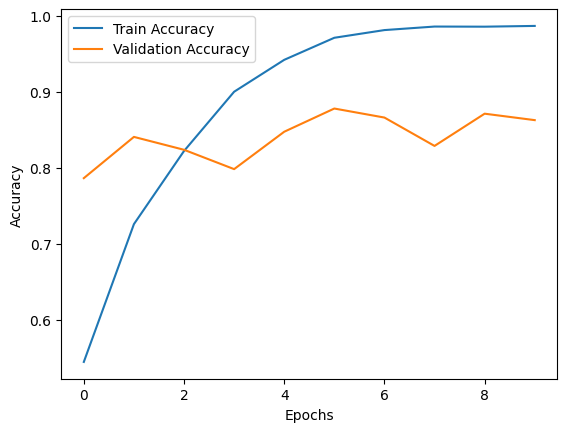

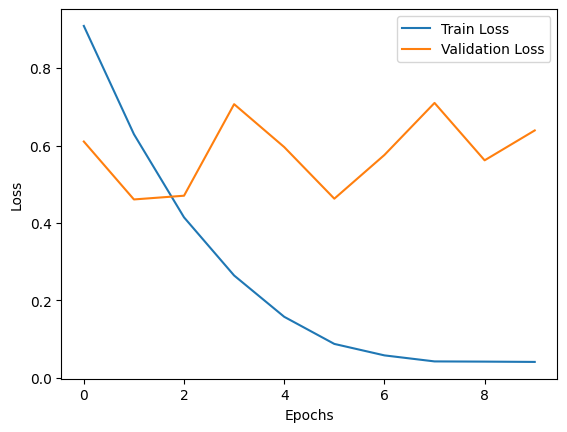

In [80]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [81]:
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_len, padding='post')
    prediction = model.predict(padded_sequence)
    sentiment = encoder.inverse_transform([prediction.argmax()])
    return sentiment[0]

# Example
print(predict_sentiment("I am feeling happy today"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Negative


In [ ]:
model.save('sentiment_analysis_model.h5')

NameError: name 'model' is not defined

In [83]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Assuming `y_test` is the true labels and `y_pred` is the model's predicted labels
y_pred = model.predict(X_test)  # Replace `X_test` with your test sequences
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step 
Confusion Matrix:
[[ 76   4   5]
 [  1  10   1]
 [ 55  15 423]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.89      0.70        85
           1       0.34      0.83      0.49        12
           2       0.99      0.86      0.92       493

    accuracy                           0.86       590
   macro avg       0.64      0.86      0.70       590
weighted avg       0.91      0.86      0.88       590



In [84]:
import pickle

In [85]:
# with open('sentiment_analysis_model.pkl', 'wb') as file:
#     pickle.dump(model, file)

In [86]:
with open("tokenizer.pkl", "wb") as files:
    pickle.dump(tokenizer, files)

In [87]:
with open("encoder.pkl", "wb") as files:
    pickle.dump(encoder, files)